In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv('titanic.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


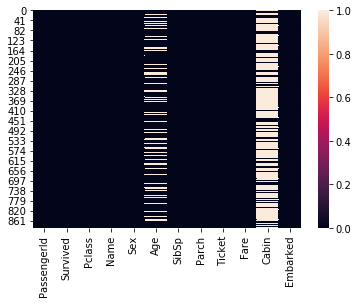

In [5]:
sns.heatmap(train.isnull() )

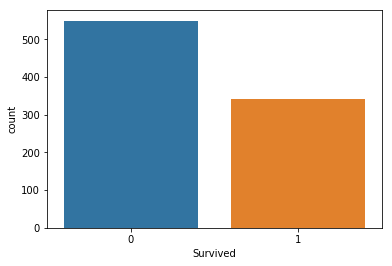

In [6]:
sns.countplot(x='Survived',data=train)

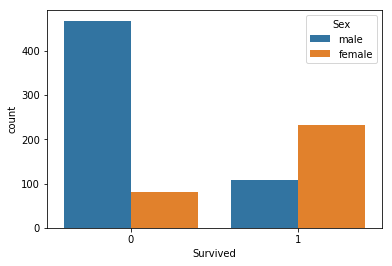

In [7]:
sns.countplot(x='Survived',hue='Sex',data=train)

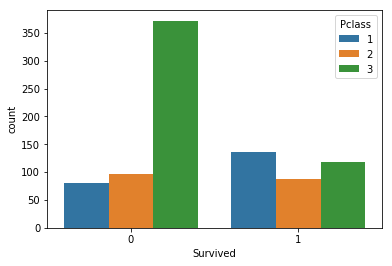

In [8]:
sns.countplot(x='Survived',hue='Pclass',data=train)

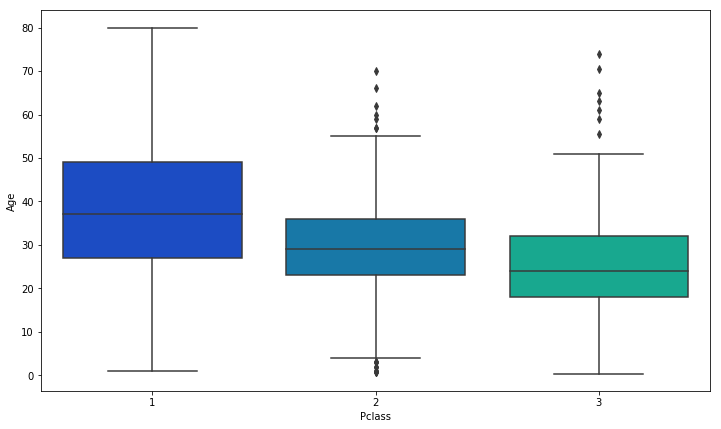

In [9]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [10]:
def impute_age(cols):
    Age = cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else: 
            return 24
    else:
        return Age
    


In [11]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

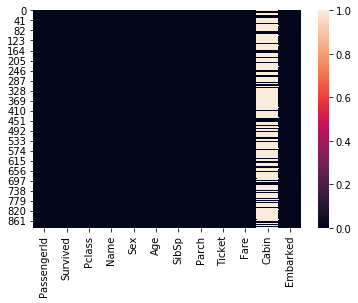

In [12]:
sns.heatmap(train.isnull())

In [13]:
train.drop('Cabin',axis=1,inplace=True)

In [14]:
sex=pd.get_dummies(train['Sex'],drop_first=True)
embark=pd.get_dummies(train['Embarked'],drop_first=True)

In [15]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [16]:
train=pd.concat([train,sex,embark],axis=1)

In [17]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

In [19]:
import math

In [65]:
X_train

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
520,521,1,30.00,0,0,93.5000,0,0,1
510,511,3,29.00,0,0,7.7500,1,1,0
446,447,2,13.00,0,1,19.5000,0,0,1
2,3,3,26.00,0,0,7.9250,0,0,1
691,692,3,4.00,0,1,13.4167,0,0,0
195,196,1,58.00,0,0,146.5208,0,0,0
790,791,3,24.00,0,0,7.7500,1,1,0
257,258,1,30.00,0,0,86.5000,0,0,1
39,40,3,14.00,1,0,11.2417,0,0,0
234,235,2,24.00,0,0,10.5000,1,0,1


In [234]:
def evaluate_algo(alpha,n_epoch):
    b0=0
    b1=0
    b2=0
    b3=0
    X1 = X_test['male']
    X2 = X_test['Pclass']
    X3 = X_test['Age']
    Y1 = y_train
    predictions = list()
    for epoch in range(n_epoch):
        sum_error=0
        for (x1,x2,x3,y) in zip(X1,X2,X3,Y1):
            y_temp = float(1/(1+math.exp(-(b0+b1*x1+b2*x2+b3*x3))))
            predictions.append(y_temp)
            error = y_temp - y
            sum_error += error**2
            b0 = b0-alpha*error
            #predictions.append(y_temp)
            #b0 = float(b0 + alpha*(y-y_temp)*y_temp*(1-y_temp)*1)
            b1 = float(b1 + alpha*(y-y_temp)*y_temp*(1-y_temp)*x1)
            b2 = float(b2 + alpha*(y-y_temp)*y_temp*(1-y_temp)*x2)
            b3 = float(b3 + alpha*(y-y_temp)*y_temp*(1-y_temp)*x3)
        print(f"epoch={epoch}  l_rate={alpha}  sum_error={round(sum_error,3)}")


        
    print (b0,b1,b2)
    
        
    #print(predictions)
    print("\n")
        
    return predictions
        
        

In [235]:
def decision():
    
    b_temp=evaluate_algo(0.3,150)
    #print(str(b_temp)+" ")
    temp=list()
    for i in b_temp:
        #print(i)
        if(i>=0.5):
            temp.append(1)
            #print (i)

           
        else:
            temp.append(0)
            #print (i)
    #print(X_test)        
    print("\n-------------")
    #print(y_test)
    #print(temp)
    
    count = 0
    for i,j in zip(y_test,temp):
        if(i==j):
            count+=1
            #print(count)
            
    #print(count)
    accuracy = count/len(y_test)*100  
    print(accuracy)
    #plt.plot(temp,y_test)
    #plt.show()
            

In [236]:
decision()

epoch=0  l_rate=0.3  sum_error=149.401
epoch=1  l_rate=0.3  sum_error=107.028
epoch=2  l_rate=0.3  sum_error=98.828
epoch=3  l_rate=0.3  sum_error=96.279
epoch=4  l_rate=0.3  sum_error=103.305
epoch=5  l_rate=0.3  sum_error=129.627
epoch=6  l_rate=0.3  sum_error=102.787
epoch=7  l_rate=0.3  sum_error=108.636
epoch=8  l_rate=0.3  sum_error=104.639
epoch=9  l_rate=0.3  sum_error=103.548
epoch=10  l_rate=0.3  sum_error=104.485
epoch=11  l_rate=0.3  sum_error=111.209
epoch=12  l_rate=0.3  sum_error=108.801
epoch=13  l_rate=0.3  sum_error=103.752


OverflowError: math range error

In [219]:
train['Survived'].iloc[331]

0

In [195]:
import matplotlib.pyplot as plt
%matplotlib inline